# Spectral Clustering
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement the **KNN graph** and other necessary algorithms for **spectral clustering**
- play with the **threshold** of spectral clustering
- apply spectral clustering on toy data and **real world data**, and compare it with k-means

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked to.

In [1]:
# some basic imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import math
from cluster_plot import cluster_plot

%matplotlib inline

%load_ext autoreload
%autoreload 2

## Experiment Spectral Clustering on synthesis data

In [2]:
cluster_data = sio.loadmat('cluster_data.mat')
X = cluster_data['X']

C:\Users\ly\Desktop\ML_dc\ml2018winter_hw4\spectral_clustering\kmeans.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  x = x.astype(float)


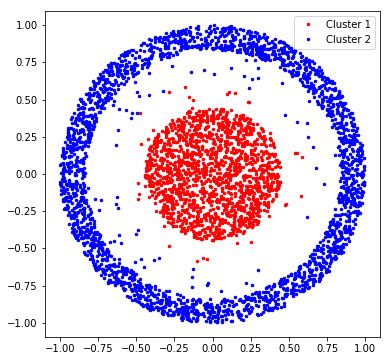

In [3]:
# Uncomment following two line and choose proper parameters
k_in_knn_graph = 200
threshold = 0.3
# implement knn_graph in knn_graph.py
from knn_graph import knn_graph

W = knn_graph(X, k_in_knn_graph, threshold)
# implement spectral in spectral
from spectral import spectral

idx = spectral(W, 2)
cluster_plot(X, idx)

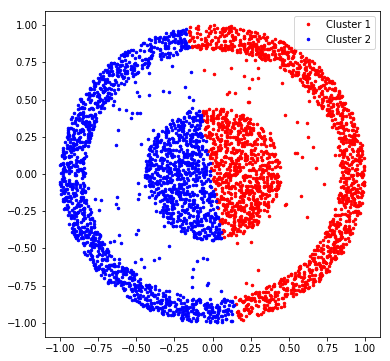

In [4]:
from kmeans import kmeans

idx = kmeans(X, 2)
cluster_plot(X, idx)

## Let's try Spectral Clustering on real-world data!

In [5]:
TDT2_data = sio.loadmat('TDT2_data.mat')
fea = TDT2_data['fea']
gnd = TDT2_data['gnd'].reshape(-1)

In [6]:
from constructW import constructW
from bestMap import bestMap
from MutualInfo import MutualInfo
# YOUR CODE HERE
# begin answer
W = constructW(fea, k=60)

spectral_accuracy = 0
kmeans_accuracy = 0
spectral_nor_mutua_info = 0
kmeans_nor_mutua_info = 0

N_loop = 10
N = len(gnd)
cluster_num = len(np.unique(gnd))

for i in range(N_loop):
    label = bestMap(gnd, spectral(W, cluster_num))
    spectral_accuracy = spectral_accuracy + np.sum(gnd == label)
    spectral_nor_mutua_info = spectral_nor_mutua_info + MutualInfo(gnd, label)
    
    label = bestMap(gnd, kmeans(fea.toarray(), cluster_num))
    kmeans_accuracy = kmeans_accuracy + np.sum(gnd == label)
    kmeans_nor_mutua_info = kmeans_nor_mutua_info + MutualInfo(gnd, label)

print("spectral_accuracy = {}, spectral_nor_mutua_info = {}".format(spectral_accuracy / (N * N_loop), spectral_nor_mutua_info / N_loop))
print("kmeans_accuracy = {}, kmeans_nor_mutua_info = {}".format(kmeans_accuracy / (N * N_loop), kmeans_nor_mutua_info / N_loop))
# end answer

spectral_accuracy = 0.5916603487490523, spectral_nor_mutua_info = 0.9731435476278678
kmeans_accuracy = 0.5490523123578469, kmeans_nor_mutua_info = 0.4538815748790256
